# KMeans from scratch and on IRIST and MNIST DATASETS

# IRIS DATASET

KMeans USING IRIS DATASET FROM SCRATCH

In [60]:
#step-1 import all libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import seaborn as sns

In [61]:
#step 2 import dataset
df=pd.read_csv(r'C:\Users\hp\OneDrive\Desktop\iris ds.csv')
#df

In [62]:
features= ['sepal.length','sepal.width','petal.length','petal.width']

In [63]:
#preprocessing of data
keys=df['variety'].unique()
values=[i for i in range(len(keys))]
mapp=dict(zip(keys,values))
print(mapp)
#replacing y by their index
df['variety']=df['variety'].replace(keys,values)

{'Setosa': 0, 'Versicolor': 1, 'Virginica': 2}


In [64]:
y=df['variety']

In [65]:
#to check whether x has null or missing values just drop that row
df=df.dropna(subset=features)

In [66]:
data=df[features].copy()
data=np.array(data)
#data

In [67]:
inds = random.choices(np.arange(0,len(data)),k=3)
random_cen = data[inds]
random_cen

array([[6.3, 3.3, 6. , 2.5],
       [5.4, 3. , 4.5, 1.5],
       [5.5, 4.2, 1.4, 0.2]])

In [68]:
def dist(a,b):
    return np.sqrt(((a-b)**2).sum())

In [75]:
def fitter(data,random_cen,k,itn=100):
    for p in range(itn):
        y = []
        for i in data:
            t=[]
            for j in random_cen:
                t.append(dist(i,j))        #eucledian dist btw all points the centroid                       
            y.append(t.index(min(t)))      # Find the closest centroid to the point and assign the point to that cluster                       
        y = np.array(y)
        random_cen=[]
        for i in set(y):
            random_cen.append(data[y==i].mean(axis=0))   #mean of all points within a cluster and make new centroid          #new centroid
    return np.array(random_cen),y

In [79]:
len(y)

150

In [14]:
cen,y = fitter(data,random_cen,k=3)
cen

array([[5.17575758, 3.62424242, 1.47272727, 0.27272727],
       [4.73809524, 2.9047619 , 1.79047619, 0.35238095],
       [6.31458333, 2.89583333, 4.97395833, 1.703125  ]])

In [56]:
#elbow method using scratch
# e=[]
# for i in range(1,11):
#     fitter(data,random_cen,i,itn=100)
#     for j in range(len(data)):
#         for k in range(len(random_cen)):
#             dis=dist(data[j],random_cen[k])
#             dis=np.sum(dis)
#             i+=1
#             e.append(dis)
# plt.plot(range(1,11),e,marker='o')
# plt.xlabel('clusters')
# plt.ylabel('dist')
# plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0, 0.5, 'y')

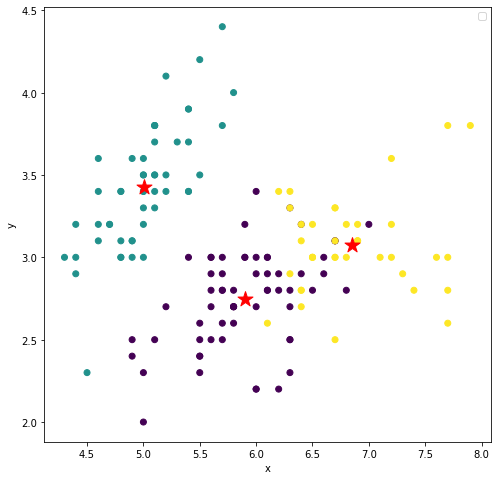

In [90]:
plt.figure(figsize=(8,8))
plt.scatter(x=data[:,0],y=data[:,1],c=y)
plt.scatter(x=cen[:,0],y=cen[:,1],c='red',marker='*',s=250)
plt.legend()
plt.xlabel('x')
plt.ylabel('y')

KMeans USING IRIS DATASET FROM SKLEARN

In [30]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3,init='random',n_init=10)
kmeans.fit(data)

KMeans(init='random', n_clusters=3, n_init=10)

In [31]:
kmeansLabels = kmeans.predict(data)
labels=kmeans.labels_
clusterCenters = kmeans.cluster_centers_

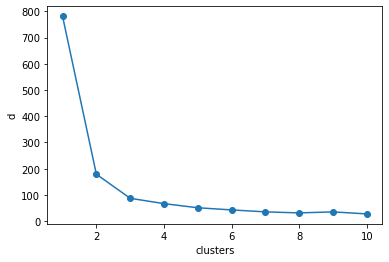

In [32]:
#elbow method
d=[]
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='random',n_init=10)
    kmeans.fit(df)
    d.append(kmeans.inertia_)
plt.plot(range(1,11),d,marker='o')
plt.xlabel('clusters')
plt.ylabel('d')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0, 0.5, 'y')

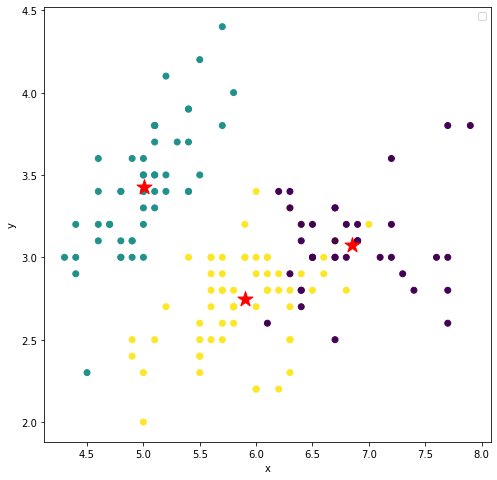

In [17]:
plt.figure(figsize=(8,8))
plt.scatter(x=data[:,0],y=data[:,1],c=labels)
plt.scatter(x=clusterCenters[:,0],y=clusterCenters[:,1],c='red',marker='*',s=250)
plt.legend()
plt.xlabel('x')
plt.ylabel('y')

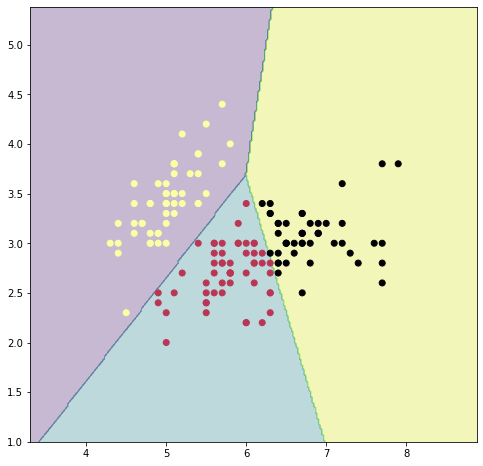

In [18]:
#decision boundary
plt.figure(figsize = (8,8))
a= np.arange(start=min(data[:,0])-1,stop=max(data[:,0])+1,step=0.02)
b= np.arange(start=min(data[:,1])-1,stop=max(data[:,1])+1,step=0.02)
xx,yy=np.meshgrid(a,b)
#classify every point
arr=np.array([xx.ravel(),yy.ravel()]).T #covert to 1d array
kmeans = KMeans(n_clusters=3,init='random',n_init=10)
kmeans.fit(data[:,:2])
y_pred = kmeans.predict(data[:,:2])
l=kmeans.predict(arr)
plt.contourf(xx,yy,l.reshape(xx.shape),alpha=0.3)
plt.scatter(data[:,0],data[:,1],c=y_pred,cmap='inferno_r')

# MNIST DATASET

KMeans USING MNIST DATASET FROM SCRATCH

In [48]:
#loading mnist_train dataset
df_train=pd.read_csv(r"C:\Users\hp\OneDrive\Desktop\mnist_train.csv")
df_test=pd.read_csv(r"C:\Users\hp\OneDrive\Desktop\mnist_test.csv")
print(df_train.shape)
print(df_test.shape)

(60000, 785)
(10000, 785)


In [49]:
df_train.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
df_train.drop(df_train.columns[0],axis=1,inplace=True)

In [22]:
df_train=np.array(df_train)

In [23]:
init_c = random.choices(np.arange(0,len(df_train)),k=10)
ran_c = df_train[init_c]

In [24]:
ran_c.shape

(10, 784)

In [25]:
mnist_cen,mnist_clust=fitter(df_train,ran_c,k=10,itn=100)

In [26]:
mnist_cen,mnist_clust

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([9, 8, 2, ..., 9, 3, 4]))

In [116]:
sns.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

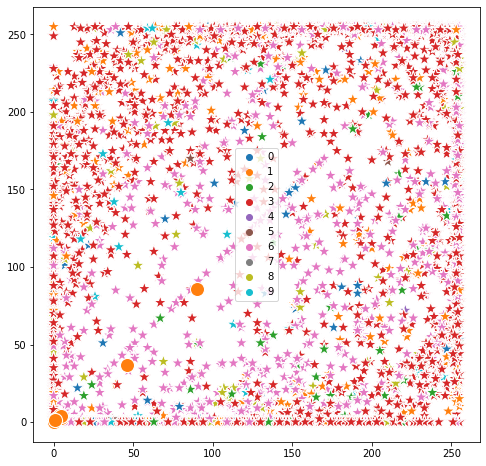

In [29]:
plt.figure(figsize=(8,8))
sns.scatterplot(df_train[:,100],df_train[:,101],hue=mnist_clust,palette=sns.color_palette(),marker="*",s=200)
sns.scatterplot(mnist_cen[:,100],mnist_cen[:,101],marker="o",s=200)

KMeans USING MNIST DATASET FROM SKLEARN

In [54]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters = 10,init='random',n_init=10)
model.fit(df_train)
clas = model.fit(df_train)
cp = model.predict(df_train)
c = model.cluster_centers_
lab = model.labels_
c

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

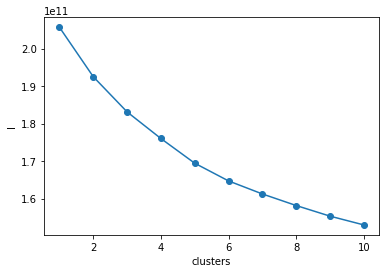

In [56]:
#elbow method
l=[]
for i in range(1,11):
    model = KMeans(n_clusters=i,init='random',n_init=10)
    model.fit(df_train)
    l.append(model.inertia_)
plt.plot(range(1,11),l,marker='o')
plt.xlabel('clusters')
plt.ylabel('l')
plt.show()

In [109]:
df_train=np.array(df_train)

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

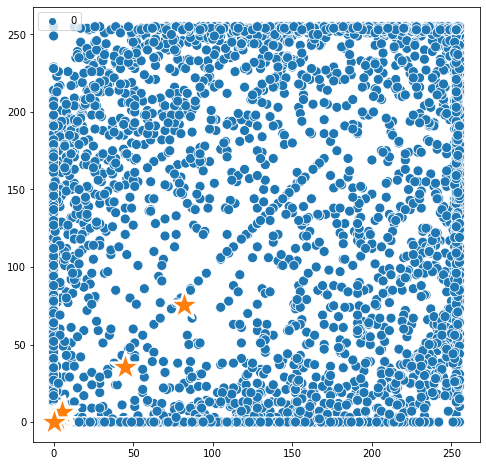

In [115]:
plt.figure(figsize=(8,8))
sns.scatterplot(df_train[:,100],df_train[:,101],hue= lab,s=100)
sns.scatterplot(c[:,100],c[:,101],marker="*",s=1000)

C:\Users\hp\AppData\Local\Temp\ipykernel_11296\419884546.py:10: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  clas = model.fit(df_train[:,:2])


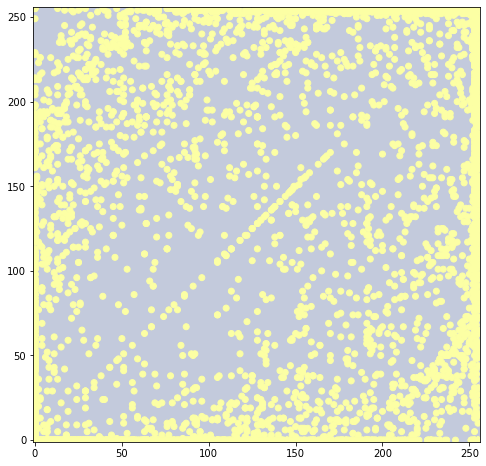

In [72]:
#decision boundary
plt.figure(figsize = (8,8))
o= np.arange(start=min(df_train[:,100])-1,stop=max(df_train[:,101])+1,step=0.02)
p= np.arange(start=min(df_train[:,100])-1,stop=max(df_train[:,101])+1,step=0.02)
x_x,y_y=np.meshgrid(o,p)
#classify every point
array=np.array([x_x.ravel(),y_y.ravel()]).T #covert to 1d array
model = KMeans(n_clusters = 10,init='random',n_init=10)
model.fit(df_train)
clas = model.fit(df_train[:,:2])
cp = model.predict(df_train[:,:2])
lab = model.labels_
r=model.predict(array)
plt.contourf(x_x,y_y,r.reshape(x_x.shape),alpha=0.3)
plt.scatter(df_train[:,100],df_train[:,101],c=cp,cmap='inferno_r')

In [ ]:
#split data make squares allot each centroid 